In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [2]:
df_svm_4q = pd.read_csv('../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../ML_results/SVM/svm_8q.csv')

select all test table runs

In [5]:
df_svm_4q = df_svm_4q[df_svm_4q['machines'] == 1111]
df_svm_8q = df_svm_8q[df_svm_8q['machines'] == 1111]

df_svm_4q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_4q,False)
df_svm_8q_hsr = mvf.get_df_with_same('tr&v circuits','test circuits',df_svm_8q,False)

## HSR with all circuits (c111)

In [6]:
df_svm_4q_hsr_c111 = df_svm_4q[df_svm_4q['tr&v circuits'] == 111]
df_svm_8q_hsr_c111 = df_svm_8q[df_svm_8q['tr&v circuits'] == 111]

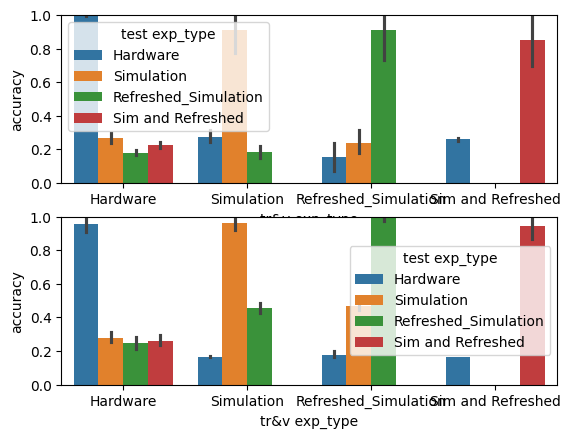

In [7]:
#labels = ["c3","c2","c2,3","c1"]
plt.subplot(211)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_hsr_c111, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
# ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.subplot(212)
ax_bva_8qs=sns.barplot(
    df_svm_8q_hsr_c111, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
# ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.show()

### Observations

When training and testing on different exp_types, accuracy is always below 50%.
-> Therefore noise profile is not comparable across different exp_types.
One thing to note is training on refreshed and testing on sim ~50% for 8qubits

Hardware accuracy is higher with 4 qubits, others are higher with 8 qubits

## HSR with c1

In [8]:
df_svm_4q_hsr_c1 = df_svm_4q[df_svm_4q['tr&v circuits'] == 100]
df_svm_8q_hsr_c1 = df_svm_8q[df_svm_8q['tr&v circuits'] == 100]

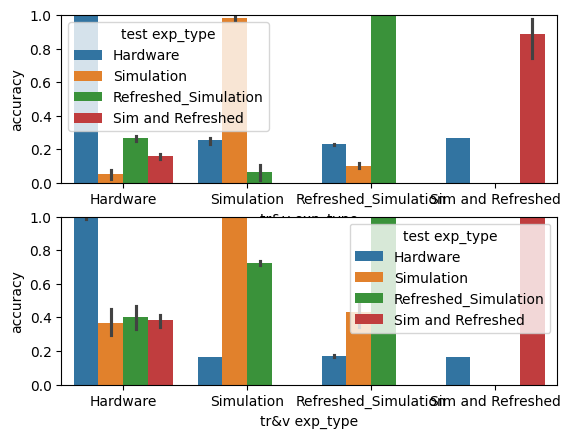

In [9]:
plt.subplot(211)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_hsr_c1, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
# ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.subplot(212)
ax_bva_8qs=sns.barplot(
    df_svm_8q_hsr_c1, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
# ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.show()

### Observations

Same as before except that training on sim and testing on refreshed yielded accuracy > 50% (~70%) (for 8 qubits)

## HSR with c2

In [10]:
df_svm_4q_hsr_c2 = df_svm_4q[df_svm_4q['tr&v circuits'] == 10]
df_svm_8q_hsr_c2 = df_svm_8q[df_svm_8q['tr&v circuits'] == 10]

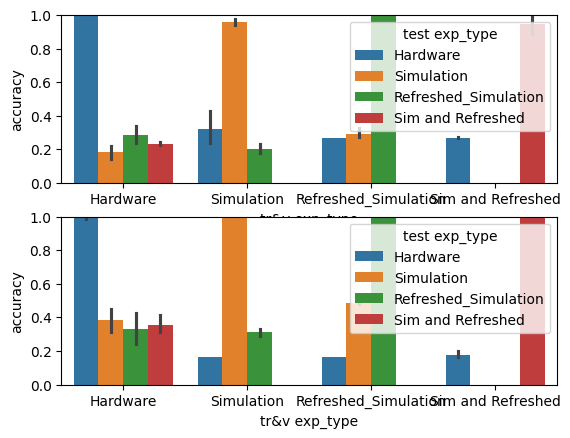

In [11]:
plt.subplot(211)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_hsr_c2, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
# ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.subplot(212)
ax_bva_8qs=sns.barplot(
    df_svm_8q_hsr_c2, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
# ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.show()

### Observations
Same as c111

## HSR with c3

In [12]:
df_svm_4q_hsr_c3 = df_svm_4q[df_svm_4q['tr&v circuits'] == 1]
df_svm_8q_hsr_c3 = df_svm_8q[df_svm_8q['tr&v circuits'] == 1]

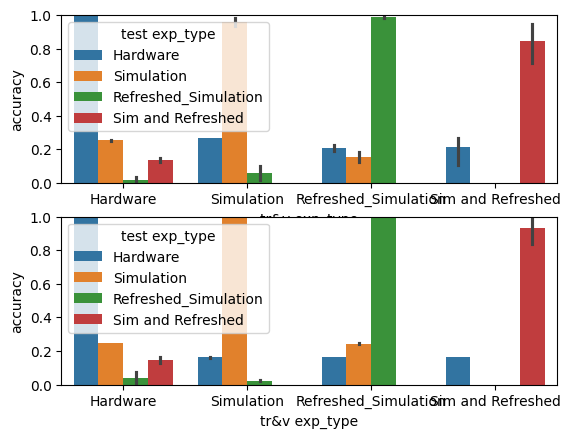

In [13]:
plt.subplot(211)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_hsr_c3, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
# ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.subplot(212)
ax_bva_8qs=sns.barplot(
    df_svm_8q_hsr_c3, x = 'tr&v exp_type', y = 'accuracy',
    hue = 'test exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
# ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.show()

## Observations

All cross-exp type accuracies are ~<30%. This one might be good if you want to prevent spoofing